<h1> Loan Prediction Problem <h1>

<h3> We are given a dataset of loan applications and based on data we need to predict whether a loan will be approved or not <h3>

<h4> 
     Task - Classification Problem to predict whether loan will be approved or not
     Performance - Performance will be measured using Accuracy Score of Classification
     Experience - We are given a train dataset of 614 applications
<h4>

Independent Variables
    - Gender - Categorical Variable ( Male/Female)
    - Married - Categorical Variable ( Yes/No)
    - Dependents - Ordinal Categorical Variable ( 0/1/2/3+)
    - Education - Ordinal Categorical Variable ( Not Graduate/Graduate)
    - Self Employed - Categorical Variable ( Yes/No)
    - ApplicantIncome - Numerical Variable 
    - CoapplicantIncome - Numerical Variable
    - Loan Amount - Numerical Variable
    - Loan Amount Term - Numerical Variable (in months)
    - Credit History - Categorical Variable (1.0 / 0.0)
    - Loan Status - Categorical Variable (Y/N)
    - Loan_ID

In [2]:
import os
from scipy import stats
import pandas as pd
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
import matplotlib.pyplot as plt        # For plotting graphs
%matplotlib inline

import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")

Importing Train & Test datasets.

** Test dataset is used for submission to Datahack competition on AV.

In [3]:
train = pd.read_csv('./train_u6lujuX_CVtuZ9i.csv')
test = pd.read_csv('./test_Y3wMUE5_7gLdaTN.csv')
print(test.shape)
print(train.shape)

(367, 12)
(614, 13)


In [4]:
train_original = train.copy()
test_original = test.copy()

In [5]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [325]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


<h1> Exploratory Data Analysis <h1>

<h3> We will do following as part of pre-processing of data before training the model </h3>
 
 - Univariate Analysis
 - Bivariate Analysis
 - Missing Values
 - Outlier treatment
 - Correlation/Covariance
 - PCA ( DImensionality Reduction)

<p>Loan_ID is not to be used, as it is just a unique identifier for loan application. We will delete this column from train & test datasets</p>

In [6]:
train.drop(columns='Loan_ID', inplace=True)
test.drop(columns='Loan_ID', inplace=True)

# Univariate Analysis

## Categorical Variables

<h3> Gender, Married, Self_Employed <h3>

Count and Count% are used as measure and plotted using box plot


In [7]:
train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [8]:
train['Gender'].value_counts(normalize=True)

Male      0.813644
Female    0.186356
Name: Gender, dtype: float64

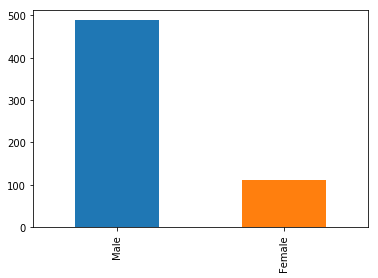

In [9]:
train['Gender'].value_counts().plot(kind='bar')

In [10]:
train['Gender'].isnull().sum()

13

<h3> There are 13 missing values in Gender. We will fill missing values with Mode value.</h3>

In [11]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)

<h3> Married </h3>

In [12]:
train['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

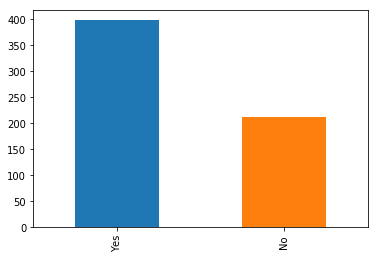

In [13]:
train['Married'].value_counts().plot.bar()

In [14]:
train['Married'].fillna(train['Married'].mode()[0], inplace=True)

In [15]:
train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [16]:
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)

## Numerical Variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1bbd2be0>]],
      dtype=object)

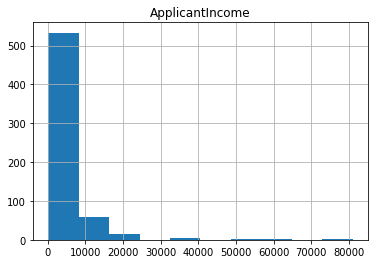

In [17]:
train.hist(column='ApplicantIncome', bins=10)

<p> ApplicantIncome is clearly not normal distributed. We can check for outliers using box-plot </p>

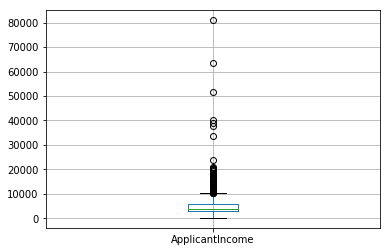

In [18]:
train.boxplot(column='ApplicantIncome')

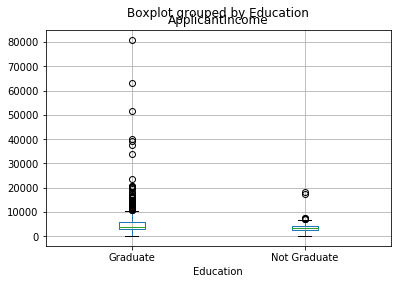

In [19]:
# We can see outliers in ApplicantINcome, Let us also see Outliers grouped by different categorical 
# variables like Education

train.boxplot(column='ApplicantIncome',by="Education")

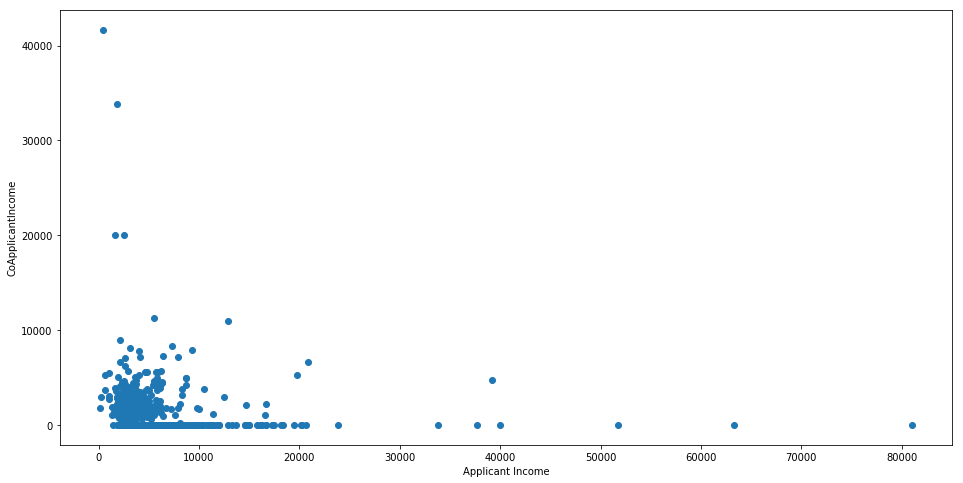

In [20]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(train['ApplicantIncome'], train['CoapplicantIncome'])
ax.set_xlabel('Applicant Income')
ax.set_ylabel('CoApplicantIncome')
plt.show()

In [359]:
train['CoapplicantIncome'].describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

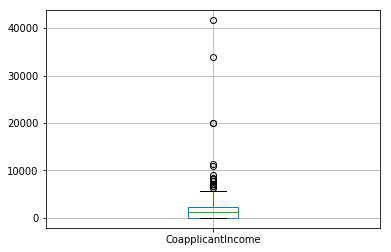

In [21]:
train.boxplot('CoapplicantIncome')

In [22]:
# We will merge ApplicantIncome & CoApplicantIncome to create a single TotalIncome Column

train['TotalIncome'] = train['ApplicantIncome'] + train['CoapplicantIncome']
train['TotalIncome'].describe()

count      614.000000
mean      7024.705081
std       6458.663872
min       1442.000000
25%       4166.000000
50%       5416.500000
75%       7521.750000
max      81000.000000
Name: TotalIncome, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1bf023c8>]],
      dtype=object)

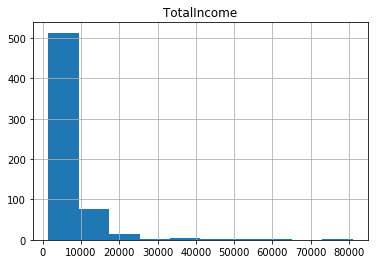

In [23]:
train.hist('TotalIncome')

<h4> we will treat outliers in TotalIncome by calculating z score and removing them </h4>

We will also  drop ApplicantIncome & CoApplicantIncome as these columns are not needed now

In [25]:
train['TotalIncome_log'] = np.log(train['TotalIncome'])

In [29]:
z = np.abs(stats.zscore(train['TotalIncome_log']))
threshold = 3
ti_outliers = np.where(z > 3)
print(ti_outliers[0])

[155 171 183 185 333 409 443 581 600]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1c8162e8>]],
      dtype=object)

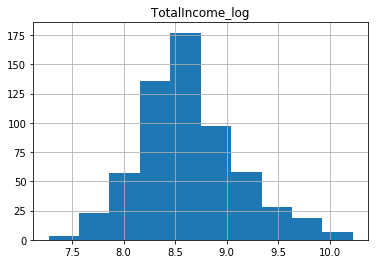

In [31]:
train.hist('TotalIncome_log')

In [30]:
train.drop(index=ti_outliers[0], axis=0, inplace=True)

In [32]:
train.drop(columns=['ApplicantIncome'], axis=1, inplace=True)

In [33]:
train.drop(columns=['CoapplicantIncome'], axis=1, inplace=True)

In [34]:
train.drop(columns=['TotalIncome'], axis=1, inplace=True)

In [330]:
# 22 null/missing values in LoanAmount

train.LoanAmount.isnull().sum()

0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1e974278>]],
      dtype=object)

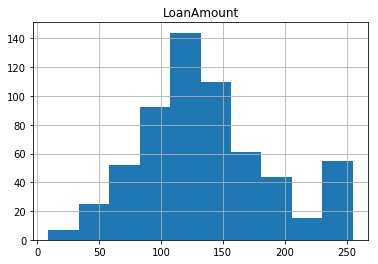

In [271]:
train.hist('LoanAmount')

In [243]:
# outliers in LoanAmount

t = np.abs(stats.zscore(train['LoanAmount']))
threshold = 3
la_outliers = np.where(t > 3)
print(la_outliers[0])

[130 175 274 304 321 364 367 426 480 499 516 518 554 595]


In [244]:
train.iloc[la_outliers]

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome_log
130,Male,No,0,Graduate,Yes,650.0,480.0,NaN,Urban,Y,9.911753
177,Male,Yes,3+,Graduate,No,495.0,360.0,0.0,Semiurban,N,9.730086
278,Male,Yes,0,Graduate,No,436.0,360.0,1.0,Semiurban,Y,9.587612
308,Male,No,0,Graduate,No,480.0,360.0,1.0,Rural,N,9.915070
325,Male,Yes,1,Graduate,Yes,376.0,360.0,0.0,Rural,N,9.521422
369,Male,Yes,0,Graduate,No,570.0,360.0,1.0,Rural,N,10.126471
372,Male,Yes,2,Graduate,Yes,380.0,300.0,1.0,Rural,Y,9.752432
432,Male,No,0,Graduate,No,405.0,360.0,1.0,Semiurban,Y,9.463120
487,Male,Yes,1,Graduate,No,500.0,360.0,1.0,Urban,N,9.816458
506,Male,Yes,0,Graduate,No,480.0,360.0,NaN,Urban,Y,10.221941


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1e141d68>,
      dtype=object)

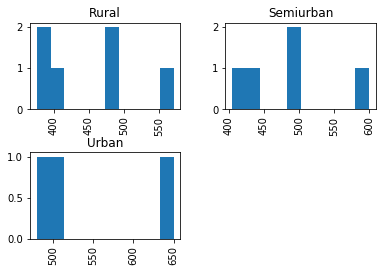

In [214]:
df_temp.hist('LoanAmount', by='Property_Area')

In [260]:
#train.LoanAmount.describe()

count    605.000000
mean     143.317324
std       77.089742
min        9.000000
25%      100.000000
50%      128.000000
75%      162.000000
max      650.000000
Name: LoanAmount, dtype: float64

In [270]:
## As LoanAMount is normally distributed, We will use IQR to detect outliers

def get_subset_by_IQR(df,column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    IQR = q3 - q1
    indexiqr = ((df[column]  < (q1 - 1.5 * IQR)) | (df[column]  > (q3 + 1.5 * IQR)))
    return indexiqr

outliersindex = get_subset_by_IQR(train,'LoanAmount')
print(outliersindex.value_counts())
train[outliersindex].head()

False    605
Name: LoanAmount, dtype: int64


,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome_log


In [269]:
## We can see 42 outliers in Loan AMount, We will do capping with floor and ceiling values instead

def cap_outliers(df,column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    IQR = q3 - q1
    miniqr = (df[column]  < (q1 - 1.5 * IQR))
    maxiqr = (df[column]  > (q3 + 1.5 * IQR))
    
    df[column][miniqr] = (q1 - 1.5 * IQR)
    df[column][maxiqr] = (q3 + 1.5 * IQR)
    return df

cap_outliers(train,'LoanAmount')

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome_log
0,Male,No,0,Graduate,No,143.317324,360.0,1.0,Urban,Y,8.674026
1,Male,Yes,1,Graduate,No,128.000000,360.0,1.0,Rural,N,8.714568
2,Male,Yes,0,Graduate,Yes,66.000000,360.0,1.0,Urban,Y,8.006368
3,Male,Yes,0,Not Graduate,No,120.000000,360.0,1.0,Urban,Y,8.505323
4,Male,No,0,Graduate,No,141.000000,360.0,1.0,Urban,Y,8.699515
5,Male,Yes,2,Graduate,Yes,255.000000,360.0,1.0,Urban,Y,9.170872
6,Male,Yes,0,Not Graduate,No,95.000000,360.0,1.0,Urban,Y,8.255569
7,Male,Yes,3+,Graduate,No,158.000000,360.0,0.0,Semiurban,N,8.619750
8,Male,Yes,2,Graduate,No,168.000000,360.0,1.0,Urban,Y,8.618305
9,Male,Yes,1,Graduate,No,255.000000,360.0,1.0,Semiurban,N,10.077819


In [268]:
train['LoanAmount'][outliersindex].count()

42

## Inference: There are outliers detected in LoanAmount, which we will impute by capping with floor and ceiling values

In [272]:
# we will drop rows which have loan amount as outliers in rural areas
train[(outliersindex) & (train.Property_Area == 'Semiurban')]

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome_log


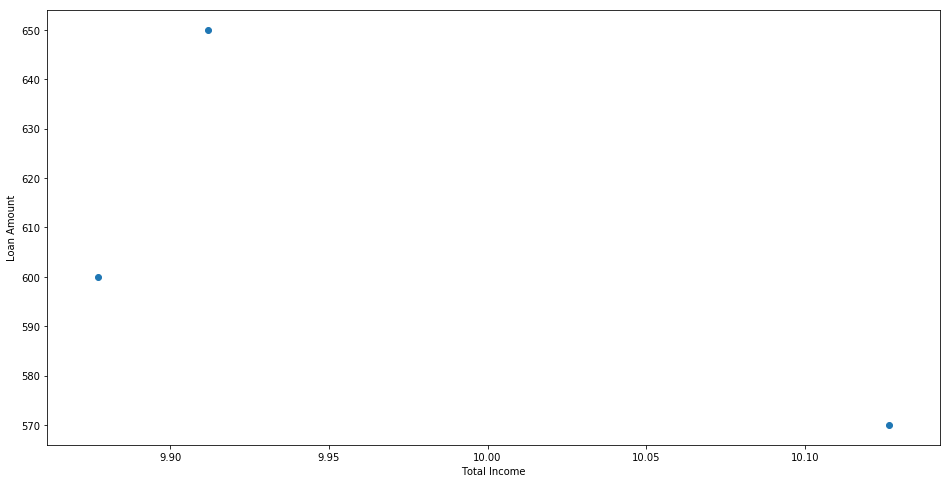

In [273]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df_temp['TotalIncome_log'], df_temp['LoanAmount'])
ax.set_xlabel('Total Income')
ax.set_ylabel('Loan Amount')
plt.show()

In [274]:
train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status', 'TotalIncome_log'],
      dtype='object')

## Inference - We clearly see positive correlation between TotalIncome & LoanAmount and linear relationship through scatter plot

In [275]:
train.corr()

,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome_log
LoanAmount,1.000000,0.098290,0.011751,0.680742
Loan_Amount_Term,0.098290,1.000000,-0.006787,-0.013320
Credit_History,0.011751,-0.006787,1.000000,0.042992
TotalIncome_log,0.680742,-0.013320,0.042992,1.000000


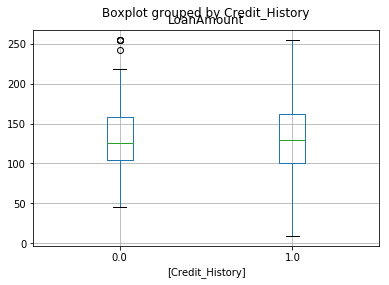

In [276]:
train.boxplot('LoanAmount', by=['Credit_History'])

In [329]:
train.isnull().sum()

Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
TotalIncome_log     0
dtype: int64

# BiVariate Analysis - Categorical vs Categorical

Lets analyse LoanStatus and Gender Variable.

Crosstab is used to create two-way table.

In [56]:
# train.groupby(['Gender','Loan_Status']).size()
genderapproval = pd.crosstab(index=train["Gender"], 
                           columns=train["Loan_Status"], margins=True)

genderapproval


Loan_Status,N,Y,All
Gender,,,
Female,37,75,112
Male,150,339,489
All,187,414,601


In [55]:
# train.groupby(['Gender','Loan_Status']).size()
gender_credithistory = pd.crosstab(index=train["Gender"], 
                           columns=train["Credit_History"], margins=True)

gender_credithistory

Credit_History,0.0,1.0,All
Gender,,,
Female,17,84,101
Male,69,382,451
All,86,466,552


# Married - Categorical Variable

In [198]:
pd.crosstab(train['Married'], train['Loan_Status'],margins=True)

Loan_Status,N,Y,All
Married,,,
No,79,134,213
Yes,113,288,401
All,192,422,614


In [112]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [278]:
train.isnull().sum()

Gender               0
Married              0
Dependents          15
Education            0
Self_Employed        0
LoanAmount           0
Loan_Amount_Term    14
Credit_History      49
Property_Area        0
Loan_Status          0
TotalIncome_log      0
dtype: int64

In [118]:
train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

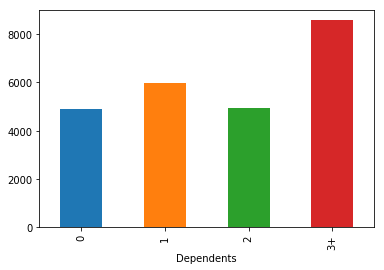

In [120]:
train.groupby('Dependents')['ApplicantIncome'].mean().plot(kind='bar')

In [279]:
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)

In [327]:
train.isnull().sum()

Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
TotalIncome_log     0
dtype: int64

In [284]:
train.Loan_Amount_Term.describe()

count    591.000000
mean     342.741117
std       64.541662
min       12.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: Loan_Amount_Term, dtype: float64

In [288]:
df_temp = train[train.Loan_Amount_Term.isnull()]

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome_log
19,Male,Yes,0,Graduate,No,115.0,NaN,1.0,Urban,Y,8.716044
36,Male,Yes,0,Graduate,No,100.0,NaN,0.0,Urban,N,8.057694
44,Male,Yes,0,Not Graduate,Yes,96.0,NaN,1.0,Urban,Y,8.454253
45,Female,No,0,Graduate,No,88.0,NaN,1.0,Urban,Y,8.134468
73,Male,Yes,3+,Not Graduate,No,95.0,NaN,0.0,Semiurban,N,8.466952
112,Male,Yes,0,Not Graduate,No,152.0,NaN,0.0,Rural,N,8.947156
165,Male,Yes,0,Graduate,No,182.0,NaN,1.0,Rural,Y,8.835356
197,Female,No,0,Not Graduate,No,120.0,NaN,1.0,Urban,Y,8.359837
223,Male,Yes,0,Graduate,No,175.0,NaN,1.0,Semiurban,Y,9.058121
232,Male,No,0,Not Graduate,No,120.0,NaN,1.0,Rural,Y,8.663369


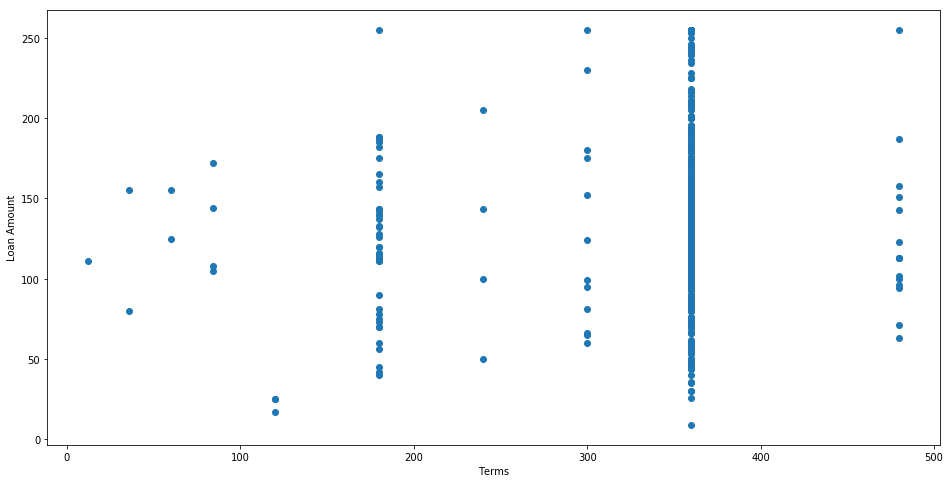

In [287]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(train['Loan_Amount_Term'], train['LoanAmount'])
ax.set_xlabel('Terms')
ax.set_ylabel('Loan Amount')
plt.show()

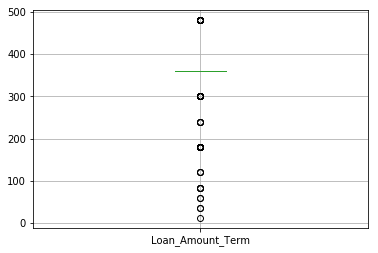

In [282]:
train.boxplot(column="Loan_Amount_Term")

In [290]:
train.corr()

,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome_log
LoanAmount,1.000000,0.098290,0.011751,0.680742
Loan_Amount_Term,0.098290,1.000000,-0.006787,-0.013320
Credit_History,0.011751,-0.006787,1.000000,0.042992
TotalIncome_log,0.680742,-0.013320,0.042992,1.000000


In [320]:
data_test = train.loc[train['Loan_Amount_Term'].isnull(),['LoanAmount','TotalIncome_log']]                              
data_train = train.loc[train['Loan_Amount_Term'].notnull(),['LoanAmount','TotalIncome_log','Loan_Amount_Term']]

data_test.shape


(14, 2)

## using kNN to impute missing values in Loan_Amount_Term

In [321]:
# knn_impute(target=df['Age'], attributes=df.drop(['Age', 'PassengerId'], 1),
#                                     aggregation_method="median", k_neighbors=10, numeric_distance='euclidean',
#                                     categorical_distance='hamming', missing_neighbors_threshold=0.8)

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(data_train.iloc[:,[0,1]], data_train['Loan_Amount_Term'])

# Predicted class
print(neigh.predict(data_test))


# 3 nearest neighbors
print(neigh.kneighbors(data_test)[1])


[360. 360. 360. 360. 360. 360. 360. 360. 360. 360. 360. 360. 360. 360.]
[[242 261 306 389 388]
 [480 403  46  16 414]
 [469 434  52 486 289]
 [575 303 131 408 165]
 [336 380   6 347 521]
 [391 330 145 251 284]
 [538 123 319 532  73]
 [183 193 544 375 302]
 [112  84 136 351 423]
 [ 28 358 273  44  56]
 [492 140 445  10 545]
 [483 307 265 192  15]
 [194 525 465  38 263]
 [448 314 556 281  37]]


In [318]:
train.loc[307]

Gender                Female
Married                   No
Dependents                 0
Education           Graduate
Self_Employed             No
LoanAmount               104
Loan_Amount_Term         360
Credit_History             0
Property_Area          Urban
Loan_Status                N
TotalIncome_log      8.35773
Name: 307, dtype: object

In [322]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].median(), inplace=True)

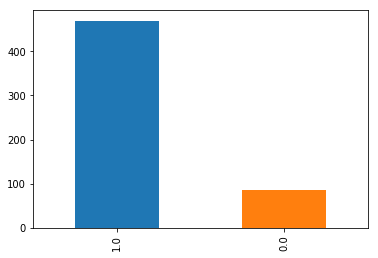

In [323]:
train['Credit_History'].value_counts().plot.bar()

In [324]:
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [213]:
y = train['Loan_Status']

# Analyzing test set data

In [328]:
test.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [332]:
## Making all the pre-processing on test data, as done on training set

test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].median(), inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)
test['TotalIncome'] = test['ApplicantIncome'] + test['CoapplicantIncome']
test['TotalIncome_log'] = np.log(test['TotalIncome'])
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace=True)
test.drop(columns=['TotalIncome'], axis=1, inplace=True)
test.drop(columns=['ApplicantIncome'], axis=1, inplace=True)
test.drop(columns=['CoapplicantIncome'], axis=1, inplace=True)

In [338]:
print(train.columns.tolist())
print(test.columns)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status', 'TotalIncome_log']
Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'TotalIncome_log'],
      dtype='object')


In [343]:
y_train = train['Loan_Status']

(605, 10)

In [421]:
X_train = train.loc[:,['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'TotalIncome_log']]
X_train.shape

(605, 10)

In [419]:
y_train = y_train_copy

## Label encoding of our target variable

In [422]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(y_train)

y = label_encoder.transform(y_train)
print(y.shape)

(605,)


## One-hot encoding of our training & test set data

In [423]:
X = pd.get_dummies(X_train)

print(X.head())


   LoanAmount  Loan_Amount_Term  Credit_History  TotalIncome_log  \
0  143.317324             360.0             1.0         8.674026   
1  128.000000             360.0             1.0         8.714568   
2   66.000000             360.0             1.0         8.006368   
3  120.000000             360.0             1.0         8.505323   
4  141.000000             360.0             1.0         8.699515   

   Gender_Female  Gender_Male  Married_No  Married_Yes  Dependents_0  \
0              0            1           1            0             1   
1              0            1           0            1             0   
2              0            1           0            1             1   
3              0            1           0            1             1   
4              0            1           1            0             1   

   Dependents_1  Dependents_2  Dependents_3+  Education_Graduate  \
0             0             0              0                   1   
1             1       

In [426]:
X.shape

(605, 19)

In [424]:
X_test = pd.get_dummies(test)

print(X_test.shape)

(367, 19)


# We are all set for applying ML models on cleansed dataset now

# Model 1 - RandomForest Classifier

In [351]:
from sklearn.ensemble import RandomForestClassifier

In [352]:
rfc = RandomForestClassifier(n_jobs=-1)
rfc.fit(X,y)
rfc.score(X,y)

0.9867768595041322

<p><b> 98% score on training data.</b></p>

In [353]:
y_pred=rfc.predict(X_test)

In [354]:
submission=pd.read_csv("./Sample_Submission_ZAuTl8O_FK3zQHh.csv")
submission.head()

,Loan_ID,Loan_Status


In [356]:
submission['Loan_Status'] = y_pred
submission['Loan_ID'] = test_original['Loan_ID']
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('randomforest_17jan.csv', index=False)

### <b> This is giving low training error but high test error; A clear case of overfit - Low bias, High Variance ; got 98% on training data, 72.5% on test data</b>

# Model 2 - Logistic Regression Model

In [408]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics

In [410]:
X_train,X_cv,y_train,y_cv= train_test_split(X,y, test_size =0.3)

In [411]:
y_cv.shape

(182,)

In [412]:
lrm = LogisticRegression(C=1, penalty="l1", random_state=0)
lrm.fit(X_train, y_train)
y_train_pred = lrm.predict(X_train)
accuracy_score(y_train_pred,y_train)

0.8014184397163121

In [413]:
y_cv_pred = lrm.predict(X_cv)
accuracy_score(y_cv_pred,y_cv)
target_names = ['class 0','class 1']
#print(y_cv_pred)
print(classification_report(y_cv, y_cv_pred, target_names=target_names))
print(metrics.confusion_matrix(y_cv, y_cv_pred))

             precision    recall  f1-score   support

    class 0       0.97      0.51      0.67        57
    class 1       0.82      0.99      0.90       125

avg / total       0.86      0.84      0.82       182

[[ 29  28]
 [  1 124]]


In [414]:
unique, counts = np.unique(y_cv, return_counts=True)
dict(zip(unique, counts))

{0: 57, 1: 125}

In [375]:
y_pred=lrm.predict(X_test)

submission=pd.read_csv("./Sample_Submission_ZAuTl8O_FK3zQHh.csv")
submission.head()

submission['Loan_Status'] = y_pred
submission['Loan_ID'] = test_original['Loan_ID']
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logisticregression_18jan.csv', index=False)

<h3> we are getting similar error on train and CV set using Logistic Regression Model </h3>

<h1> Using LR, we got 81% on Training & CV set and 77.7% accuracy on test set</h1>

# K-Fold Cross Validation on Logistic Regression

In [431]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=None)
score_table = []
# X is the feature set and y is the target
for train_index, val_index in skf.split(X,y): 
     
    X_tr, X_cv = X.iloc[train_index], X.iloc[val_index] 
    y_tr, y_cv = y[train_index], y[val_index]
    
    lrm = LogisticRegression(C=1, penalty="l1", random_state=0)
    lrm.fit(X_tr, y_tr)
    y_cv_pred = lrm.predict(X_cv)
    score_table.append(accuracy_score(y_cv_pred,y_cv))
    print(score_table)

avg_score = sum(score_table) / 5
avg_score

[0.8114754098360656]
[0.8114754098360656, 0.7868852459016393]
[0.8114754098360656, 0.7868852459016393, 0.7851239669421488]
[0.8114754098360656, 0.7868852459016393, 0.7851239669421488, 0.85]
[0.8114754098360656, 0.7868852459016393, 0.7851239669421488, 0.85, 0.8333333333333334]


0.8133635912026375

<h4>K-Fold CV is also giving same accuracy of 81% on CV set</h4>

# Feature Engineering

In [453]:
X_short = X.loc[:,['LoanAmount','Loan_Amount_Term','Credit_History','TotalIncome_log']]
y_short = y

In [456]:
train.corr()

,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome_log
LoanAmount,1.000000,0.095290,0.015178,0.680742
Loan_Amount_Term,0.095290,1.000000,-0.010839,-0.013664
Credit_History,0.015178,-0.010839,1.000000,0.042084
TotalIncome_log,0.680742,-0.013664,0.042084,1.000000


In [454]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=None)
score_table = []
# X is the feature set and y is the target
for train_index, val_index in skf.split(X_short,y_short): 
     
    X_tr, X_cv = X_short.iloc[train_index], X_short.iloc[val_index] 
    y_tr, y_cv = y_short[train_index], y_short[val_index]
    
    lrm = LogisticRegression(C=1, penalty="l1", random_state=0)
    lrm.fit(X_tr, y_tr)
    y_cv_pred = lrm.predict(X_cv)
    score_table.append(accuracy_score(y_cv_pred,y_cv))
    print(score_table)

avg_score = sum(score_table) / 5
avg_score

[0.6885245901639344]
[0.6885245901639344, 0.6885245901639344]
[0.6885245901639344, 0.6885245901639344, 0.6859504132231405]
[0.6885245901639344, 0.6885245901639344, 0.6859504132231405, 0.6916666666666667]
[0.6885245901639344, 0.6885245901639344, 0.6859504132231405, 0.6916666666666667, 0.6916666666666667]


0.6892665853768685

In [434]:
from sklearn.model_selection import GridSearchCV

grid={"C":np.logspace(0,4,10), "penalty":["l1","l2"]}# l1 lasso l2 ridge

CV_lrm = GridSearchCV(estimator=lrm, param_grid=grid, cv=5)
CV_lrm.fit(X, y)

CV_lrm.best_params_

{'C': 1.0, 'penalty': 'l1'}

In [278]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

param_grid = { 
    'n_estimators': [10],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5],
    'criterion' :['gini', 'entropy']
}

In [282]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [200, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [4, 5, 6, 7, 8], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [283]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'log2',
 'n_estimators': 200}

In [295]:
rfc1=RandomForestClassifier(max_features='log2', n_estimators= 200, max_depth=5, criterion='entropy')

In [296]:
rfc1.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [298]:
rfc1.score(X,y)

0.8143322475570033

In [293]:
pred=rfc1.predict(X_test)

In [294]:
submission['Loan_Status'] = pred
submission['Loan_ID'] = test_original['Loan_ID']
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('rfc_cv_11.csv', index=False)

### This is giving 81% accuracy on training set and 77% on test set; High training error, High test error, - A case of high bias, high variance both